In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)
chicago_df_4 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)

C:\Users\User\anaconda3\envs\Deep-Learning\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'
b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\User\anaconda3\envs\Deep-Learning\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
chicago_df_1.shape

(1872343, 23)

In [4]:
chicago_df_3.shape

(1456714, 23)

In [5]:
chicago_df_2.shape

(2688710, 23)

In [6]:
chicago_df_4.shape

(1923515, 23)

In [7]:
chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3,chicago_df_4])

In [8]:
chicago_df.shape

(7941282, 23)

In [9]:
#Now we visualize it

In [10]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [11]:
chicago_df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1923510,6252586,4781176,HM386461,04/01/2001 09:00:00 AM,023XX N LATROBE AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,...,37.0,19.0,06,1140960.0,1915056.0,2001.0,06/14/2006 04:14:16 AM,41.922997,-87.757492,"(41.922996623, -87.757491503)"
1923511,6252606,4671197,HM270817,09/01/2003 12:01:00 AM,045XX N MOBILE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,...,38.0,15.0,06,1133528.0,1929634.0,2003.0,04/15/2016 08:55:02 AM,41.963134,-87.784457,"(41.963133955, -87.784456675)"
1923512,6252728,4671380,HM269330,08/01/2002 09:00:00 AM,020XX W 82ND PL,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,18.0,71.0,06,1164056.0,1849944.0,2002.0,04/15/2016 08:55:02 AM,41.743865,-87.674464,"(41.743865444, -87.674463733)"
1923513,6253372,4782588,HM394550,06/04/2001 12:01:00 AM,087XX S MUSKEGON AVE,0610,BURGLARY,FORCIBLE ENTRY,OTHER,False,...,10.0,46.0,05,1196570.0,1847474.0,2001.0,07/05/2006 04:01:36 AM,41.736343,-87.555413,"(41.736342659, -87.555413094)"
1923514,6254041,4673324,HM274913,08/09/2002 03:00:00 PM,067XX S CHAMPLAIN AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,...,20.0,42.0,06,1181728.0,1860492.0,2002.0,04/15/2016 08:55:02 AM,41.772421,-87.609387,"(41.772420712, -87.609387104)"


<AxesSubplot:>

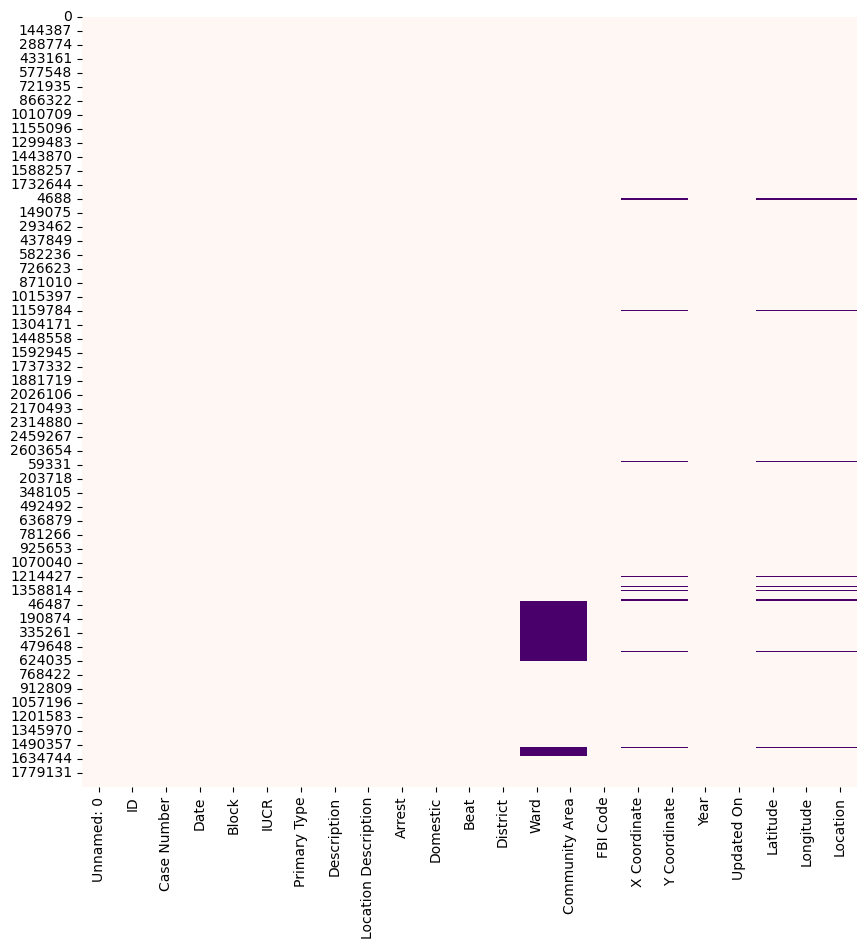

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(chicago_df.isnull(), cbar=False, cmap='RdPu')

In [13]:
#pruning the data

In [14]:
chicago_df.drop(['Unnamed: 0','Case Number', 'ID','IUCR','X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1)

In [15]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
1923510,04/01/2001 09:00:00 AM,023XX N LATROBE AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,False
1923511,09/01/2003 12:01:00 AM,045XX N MOBILE AVE,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False
1923512,08/01/2002 09:00:00 AM,020XX W 82ND PL,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1923513,06/04/2001 12:01:00 AM,087XX S MUSKEGON AVE,BURGLARY,FORCIBLE ENTRY,OTHER,False,False


In [16]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [17]:
chicago_df.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1923510   2001-04-01 09:00:00
1923511   2003-09-01 00:01:00
1923512   2002-08-01 09:00:00
1923513   2001-06-04 00:01:00
1923514   2002-08-09 15:00:00
Name: Date, Length: 7941282, dtype: datetime64[ns]

In [18]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [19]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
2001-04-01 09:00:00,2001-04-01 09:00:00,023XX N LATROBE AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,False
2003-09-01 00:01:00,2003-09-01 00:01:00,045XX N MOBILE AVE,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False
2002-08-01 09:00:00,2002-08-01 09:00:00,020XX W 82ND PL,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False


In [20]:
chicago_df['Primary Type'].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

In [21]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

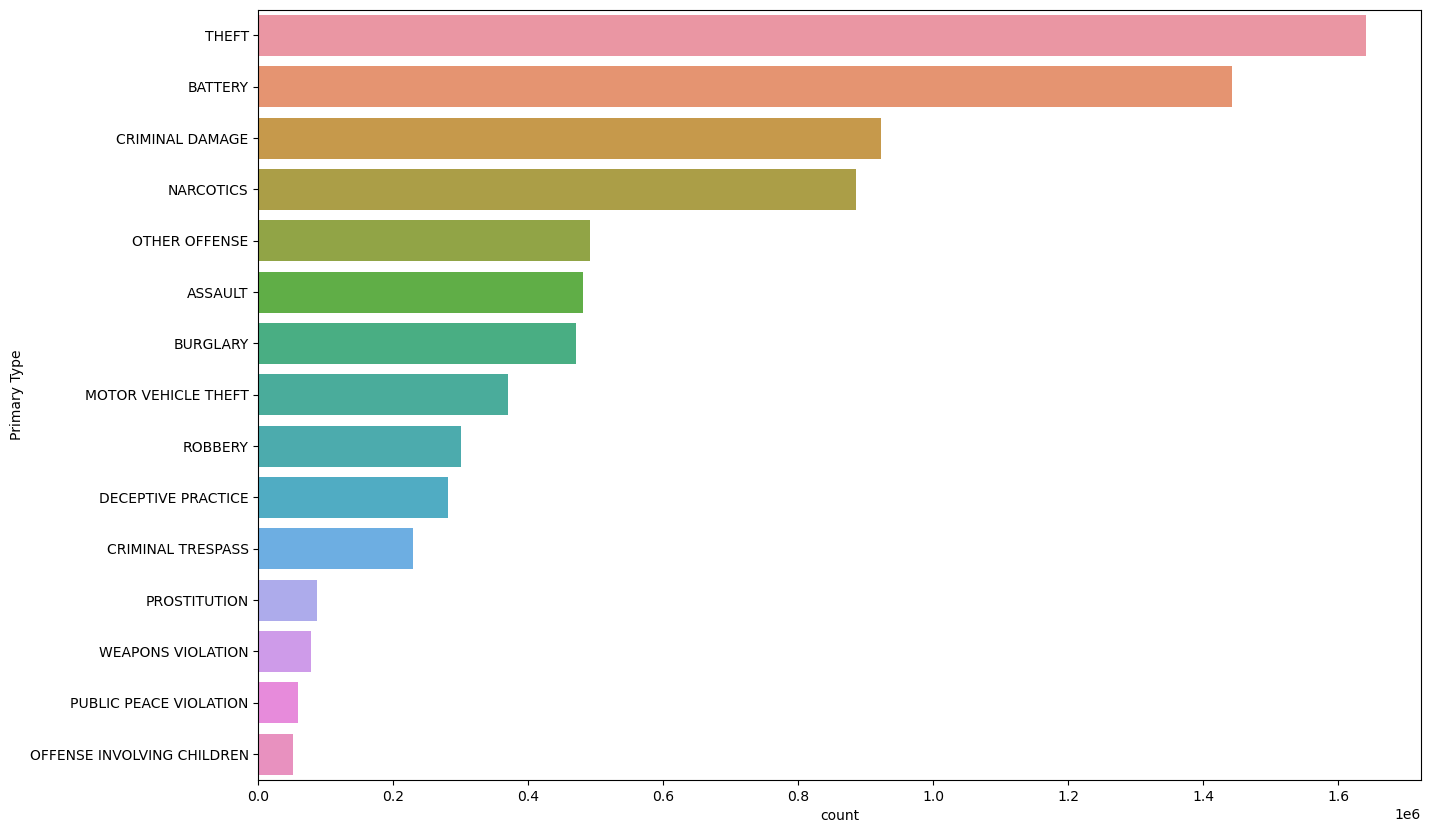

In [22]:
plt.figure(figsize = (15,10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = order_data)

Text(0.5, 1.0, 'Types of Crimes by Hour of Day')

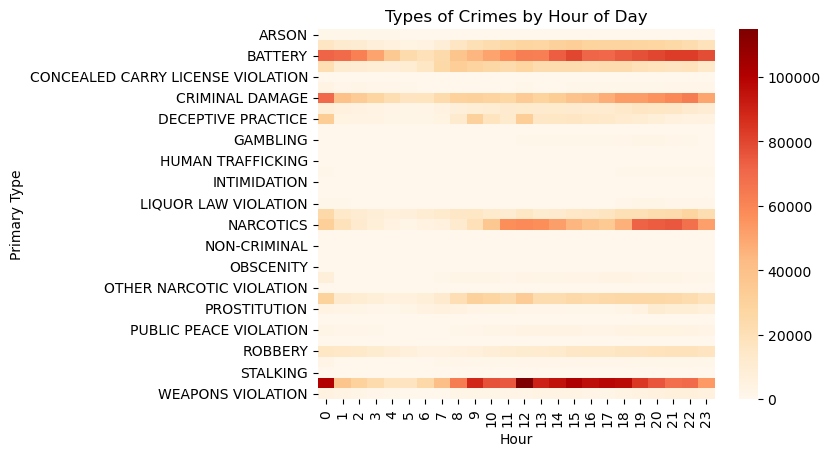

In [24]:
chicago_df['Hour'] = chicago_df.index.hour
chicago_df['Day'] = chicago_df.index.day_name()
crime_type_hour = pd.crosstab(chicago_df['Primary Type'], chicago_df['Hour'])
sns.heatmap(crime_type_hour, cmap='OrRd')
plt.title('Types of Crimes by Hour of Day')


<AxesSubplot:xlabel='count', ylabel='Location Description'>

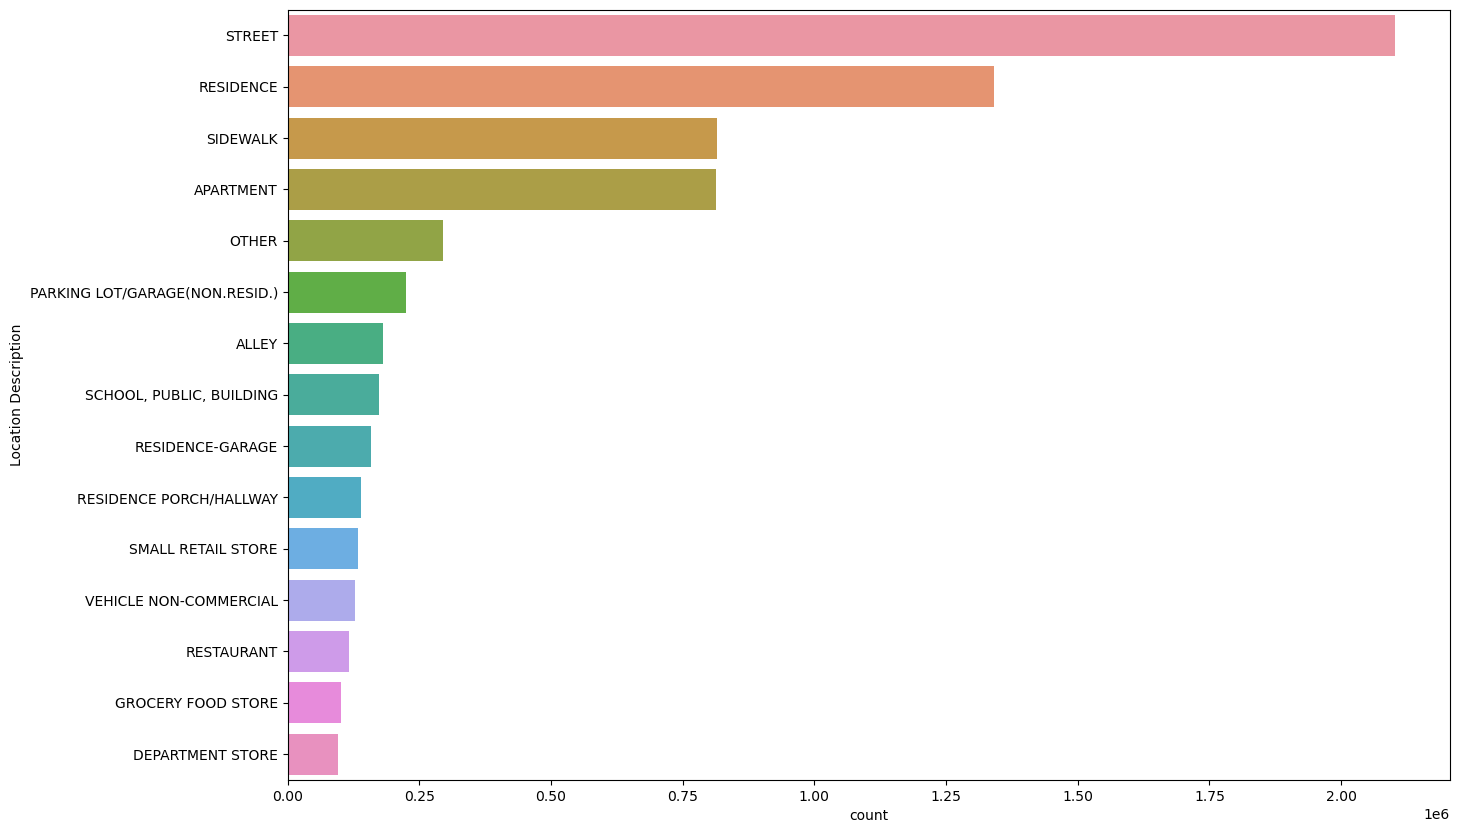

In [25]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)


In [27]:
chicago_df.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

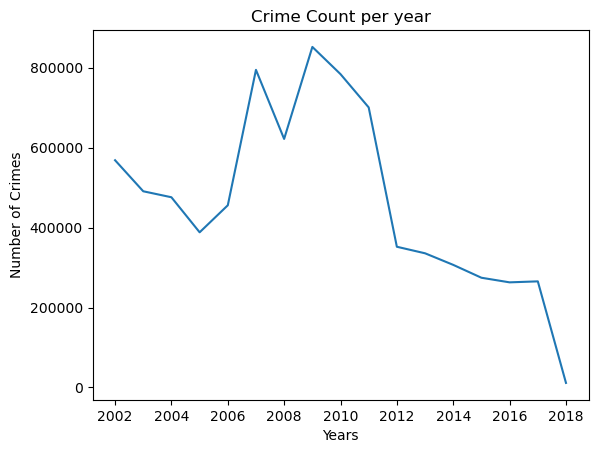

In [29]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count per year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

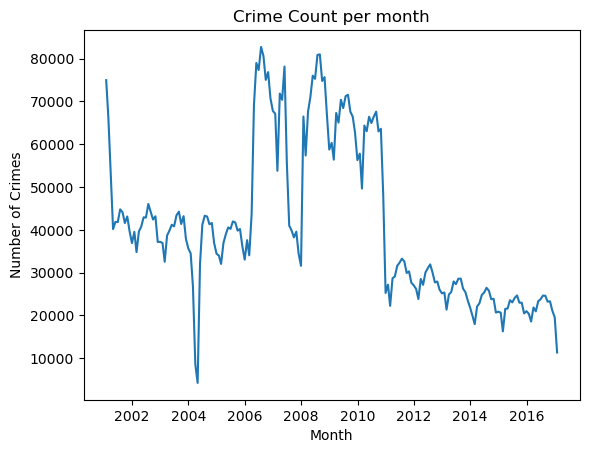

In [30]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count per month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

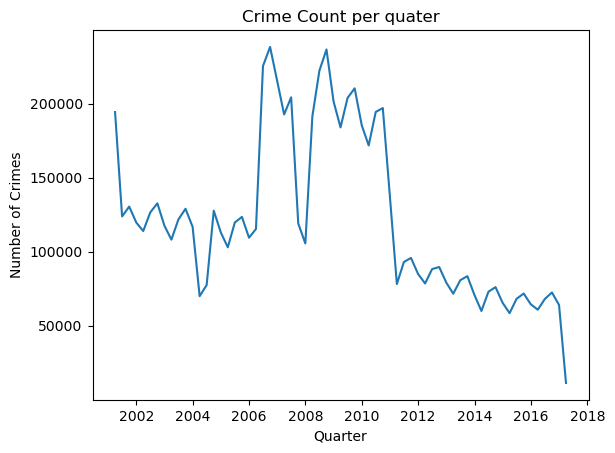

In [31]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count per quater')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

In [33]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [34]:
chicago_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [35]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [36]:
chicago_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [37]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date': 'ds', 'Crime Count': 'y'})

In [38]:
chicago_prophet_df_final

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [39]:
#prediction time

In [41]:
m = Prophet()
m.fit(chicago_prophet_df_final)

12:35:00 - cmdstanpy - INFO - Chain [1] start processing
12:35:00 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods = 730)
forecast = m.predict(future)

In [49]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40567.111750,22721.753640,54067.711243,40567.111750,40567.111750,-1574.603140,-1574.603140,-1574.603140,-1574.603140,-1574.603140,-1574.603140,0.0,0.0,0.0,38992.508610
1,2001-02-28,40714.391514,18645.015418,49296.575613,40714.391514,40714.391514,-6454.864803,-6454.864803,-6454.864803,-6454.864803,-6454.864803,-6454.864803,0.0,0.0,0.0,34259.526711
2,2001-03-31,40877.451253,23385.390246,54996.760838,40877.451253,40877.451253,-2068.131167,-2068.131167,-2068.131167,-2068.131167,-2068.131167,-2068.131167,0.0,0.0,0.0,38809.320086
3,2001-04-30,41035.251000,23125.442906,55225.737536,41035.251000,41035.251000,-1473.696754,-1473.696754,-1473.696754,-1473.696754,-1473.696754,-1473.696754,0.0,0.0,0.0,39561.554246
4,2001-05-31,41198.310739,29179.275347,60132.314445,41198.310739,41198.310739,3883.173080,3883.173080,3883.173080,3883.173080,3883.173080,3883.173080,0.0,0.0,0.0,45081.483819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2019-01-27,4026.984163,-15066.256034,15775.086635,3055.273633,4944.133852,-3602.225672,-3602.225672,-3602.225672,-3602.225672,-3602.225672,-3602.225672,0.0,0.0,0.0,424.758490
919,2019-01-28,4012.997367,-15288.660167,17717.501063,3038.474337,4932.869916,-2923.894331,-2923.894331,-2923.894331,-2923.894331,-2923.894331,-2923.894331,0.0,0.0,0.0,1089.103036
920,2019-01-29,3999.010572,-14851.396677,17388.716393,3021.675041,4921.605980,-2354.895970,-2354.895970,-2354.895970,-2354.895970,-2354.895970,-2354.895970,0.0,0.0,0.0,1644.114601
921,2019-01-30,3985.023776,-13299.569981,18178.080356,3004.875744,4910.342044,-1921.407274,-1921.407274,-1921.407274,-1921.407274,-1921.407274,-1921.407274,0.0,0.0,0.0,2063.616502


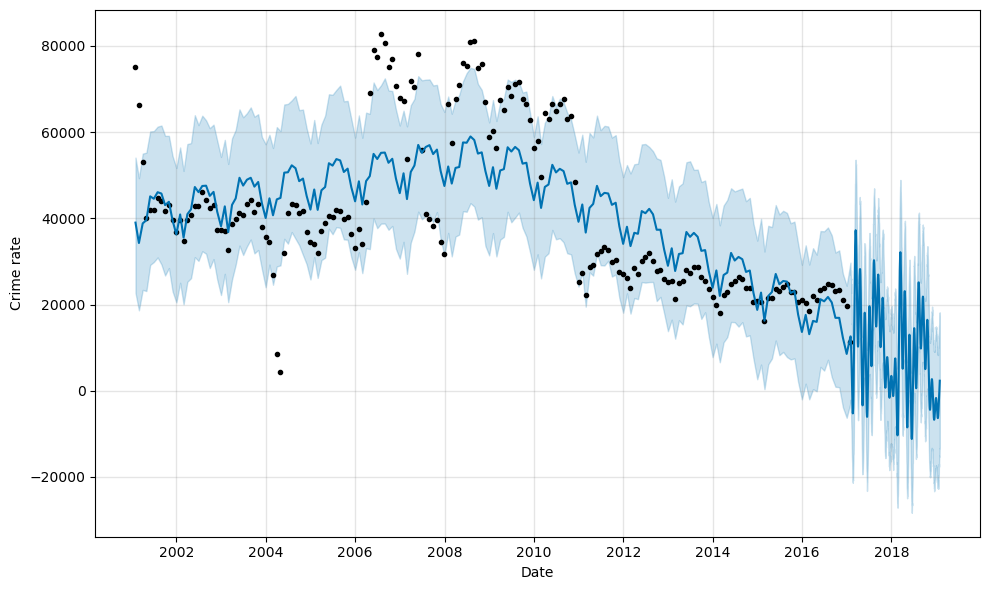

In [50]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime rate')

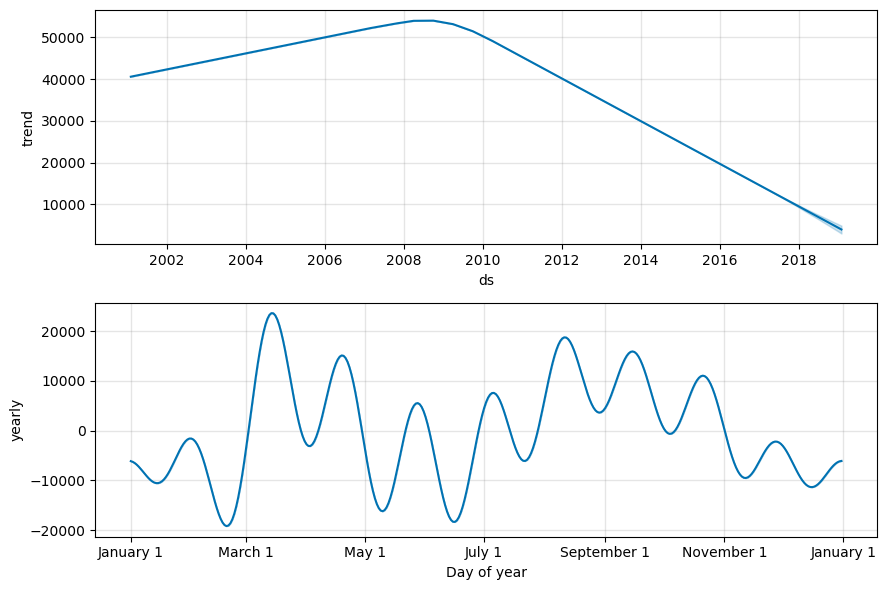

In [51]:
figure = m.plot_components(forecast)